# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# I'll create a function to pull the prices. 
# Unfortunatelly, as i can't re pull the data using the same directions in the dictionary, i create 
# an if statement to do one thing if BTC and another if ETC. 
# I can still re utilize the code use dto pull data from the url
# Used "print(json.dumps(data, indent=4))" to explore the dictionaries
# I used json, so need to import the library 

def extract_price(coin,url):
    url=url+ "?format=json"
    response_data=requests.get(url)
    response_content=response_data.content
    data = response_data.json()
    if coin.lower()=='btc':
        price=data['data']['1']['quotes']['USD']['price']
    elif coin.lower()=='eth':
        price=data['data']['1027']['quotes']['USD']['price']
    else: 
        return print("Coin is not available yet, please default to ETH or BTC")
    return price


In [6]:
# Fetch current BTC price
# YOUR CODE HERE! (see above)
extract_price('BTC',btc_url)

# Fetch current ETH price
# YOUR CODE HERE!] (see above)
extract_price('ETH',eth_url)

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=extract_price('BTC',btc_url)*my_btc
my_eth_value=extract_price('ETH',eth_url)*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15753.82
The current value of your 5.3 ETH is $2186.46


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
# YOUR CODE HERE!
my_agg=200
my_spy=50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# I make sure that everything is working
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")


# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2020-10-23", tz="America/New_York").isoformat()
end_date = start_date

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Preview DataFrame
# YOUR CODE HERE!
ticker_data.head()

AGG                                     SPY  \
                            open    high    low   close   volume    open   
time                                                                       
2020-10-23 00:00:00-04:00  117.3  117.52  117.3  117.47  3482671  345.93   

                                                             
                             high     low   close    volume  
time                                                         
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38718140

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price=ticker_data['AGG']['close'][0]
spy_close_price=ticker_data['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.47
Current SPY closing price: $345.76


In [11]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value=spy_close_price*my_spy
my_agg_value=agg_close_price*my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17288.00
The current value of your 200 AGG shares is $23494.00


### Savings Health Analysis

In [12]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000

# Create savings DataFrame
# YOUR CODE HERE!
crypto_amount=my_btc_value+my_eth_value
shares_amount=my_spy_value+my_agg_value
df_savings=pd.DataFrame([crypto_amount,shares_amount],columns=['amount'],index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,17940.278
shares,40782.000


<AxesSubplot:ylabel='amount'>

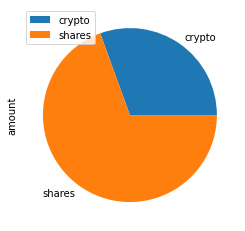

In [13]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount')

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=df_savings['amount'].sum()

# Validate saving health
# YOUR CODE HERE!
if total_savings>emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund")
elif total_savings==emergency_fund:
    print(f"Congratulations! You have reached your emergency fund amount")
else:
    print(f"You are on the right track! You need to save an additional ${emergency_fund-total_savings:0.2f} to reach your financial goal")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-23', tz='America/New_York').isoformat()
tickers = ["AGG", "SPY"]

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0  206.20   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0  206.97   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003.0  208.34   

                                                              
                             high     low   close     volume  
time                                                          
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  208.97  206.21  208.96  115482088  
2015-10-29 00:00:00-04:00  209.27  208.21  208.87   64052955

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

# input number of simulations you wnat for Montecarlo. 
# Input once for entire code
no_simulations=500

# Assumptions for MC simulations:
# Number of years
horizon=30
# weight = [AGG weight, SPY weight]
weight=[.40,.60]

MC_sims = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weight,
    num_simulation = no_simulations,
    num_trading_days = 252*horizon)

In [19]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_sims.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-10-23 00:00:00-04:00          NaN  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   

                                                   
                              volume daily_return  
time                                               
2015-10-23 00:00:00-04:00  103135843          NaN  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_sims.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015474,1.008373,1.006501,1.001605,1.010584,0.994187,1.000792,0.989872,0.999290,0.996064,...,1.012264,1.005891,0.986931,1.002253,0.993426,1.006134,0.992019,0.994837,1.001068,0.992151
2,1.003439,1.010541,1.015165,0.990212,1.013867,0.990600,1.012071,0.986880,0.998787,1.000077,...,1.018541,1.018796,0.995732,0.993410,0.995754,1.006680,0.993469,1.005262,1.000619,0.987804
3,0.996012,1.020531,1.014044,0.994481,1.010952,0.979589,1.013599,0.985261,0.986461,1.005730,...,1.019790,1.022856,0.992742,0.997948,0.998066,1.007395,0.994492,1.011725,1.000254,0.983098
4,1.002737,1.004224,1.016155,0.999169,1.008954,0.984969,1.023937,0.990175,0.995376,1.017322,...,1.007715,1.029256,0.988193,0.998054,1.004562,1.009778,1.004641,1.018705,0.983164,0.980095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.886562,4.265172,10.283645,11.418068,2.891657,2.866425,6.328966,5.888107,7.227709,13.713812,...,5.094844,18.249939,16.392880,8.978767,6.483200,26.766368,13.350426,12.154356,2.832766,5.268469
7557,14.848068,4.308861,10.366153,11.621718,2.894245,2.903585,6.371443,5.801967,7.298802,13.805799,...,5.124823,18.206291,16.593699,9.027358,6.409959,26.956943,13.177692,12.318569,2.848563,5.298093
7558,14.831521,4.345070,10.413827,11.672450,2.879917,2.874467,6.420381,5.847042,7.278724,13.836727,...,5.097129,18.339962,16.624764,9.091480,6.397735,26.868115,13.279279,12.296419,2.842259,5.316212
7559,14.816706,4.352454,10.390002,11.657851,2.881748,2.864082,6.425112,5.775875,7.264983,13.920903,...,5.163372,18.046999,16.648465,9.163714,6.348736,26.462619,13.222447,12.240731,2.828264,5.308628


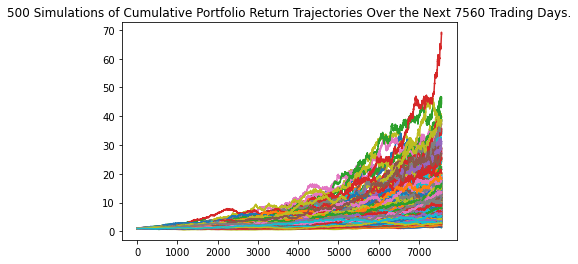

In [21]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot= MC_sims.plot_simulation()

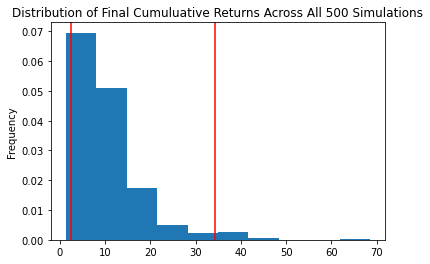

In [22]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot=MC_sims.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl= MC_sims.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             10.410720
std               7.774099
min               1.285768
25%               5.323875
50%               8.368087
75%              12.803596
max              68.579901
95% CI Lower      2.487929
95% CI Upper     34.176688
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $49758.58 and $683533.76


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 *1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $74637.87 and $1025300.64


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
# Assumptions for MC simulations:
# Number of years
horizon=5
# weight = [AGG weight, SPY weight]
weight=[.40,.60]

MC_sims = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weight,
    num_simulation = no_simulations,
    num_trading_days = 252*horizon)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_sims.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998443,1.010347,0.999179,1.011650,0.990124,1.001196,0.994536,1.006892,0.981981,0.994856,...,0.991537,1.011067,1.003416,1.006039,1.003461,1.004028,0.994327,0.997931,0.994505,0.989649
2,1.002950,1.009353,1.001535,1.002659,0.988304,1.009677,0.981001,1.000511,0.977253,0.982378,...,0.995663,1.010555,1.006801,1.017673,1.005804,1.000815,0.988738,1.007981,0.999059,1.004561
3,1.016554,1.009365,0.992011,1.011212,0.986115,1.016644,0.995488,1.013631,0.970745,0.970919,...,0.994104,1.013535,1.005784,1.005956,1.009425,0.994973,0.986741,1.010492,1.000813,1.006700
4,1.004852,1.011220,1.000348,1.026318,0.987495,1.022484,1.001319,1.002872,0.960960,0.968903,...,0.997252,1.032206,1.010638,1.005081,0.999659,0.994917,0.985526,1.018272,1.008146,1.010996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.335237,1.249865,1.740754,1.597046,1.529471,1.094857,1.133352,1.620123,1.539218,1.313899,...,1.188263,1.999810,1.768741,1.608637,1.801097,1.513251,1.725913,1.497262,1.597995,1.148755
1257,1.330088,1.246792,1.733256,1.611491,1.526161,1.088087,1.145528,1.623093,1.546062,1.310091,...,1.185701,1.985157,1.763221,1.594346,1.806167,1.492312,1.738627,1.494679,1.592881,1.150936
1258,1.316861,1.247127,1.745379,1.606661,1.506184,1.084267,1.136509,1.624668,1.557837,1.326387,...,1.194091,1.985652,1.778620,1.595322,1.807543,1.503312,1.754733,1.515689,1.605437,1.158269
1259,1.319117,1.254541,1.752920,1.618564,1.507688,1.082764,1.150662,1.601781,1.560561,1.339251,...,1.202941,1.983817,1.782486,1.591360,1.804903,1.516420,1.748129,1.535084,1.621521,1.165938


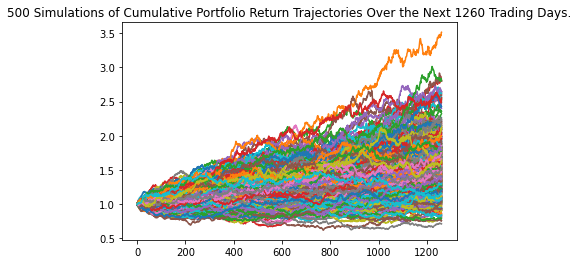

In [28]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five= MC_sims.plot_simulation()

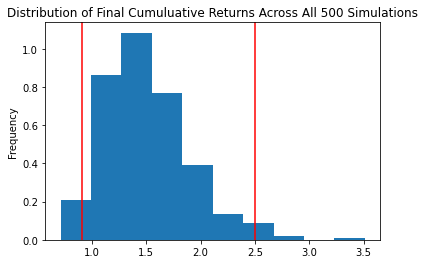

In [29]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five= MC_sims.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five= MC_sims.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_five)

count           500.000000
mean              1.506420
std               0.391999
min               0.711746
25%               1.225264
50%               1.456083
75%               1.738032
max               3.512687
95% CI Lower      0.910614
95% CI Upper      2.505633
Name: 1260, dtype: float64


In [31]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_five=round(tbl_five[8]*initial_investment,2)
ci_upper_five=round(tbl_five[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18212.28 and $50112.66


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

# Assumptions for MC simulations:
# Number of years
horizon=10
# weight = [AGG weight, SPY weight]
weight=[.40,.60]

MC_sims = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weight,
    num_simulation = no_simulations,
    num_trading_days = 252*horizon)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_sims.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995377,1.001011,1.004630,1.003980,1.000509,0.998675,0.996367,0.992783,0.997373,0.991524,...,0.995229,1.008262,0.997484,1.003173,0.996392,1.008375,0.996291,0.996416,1.000887,1.001325
2,0.996771,1.001460,1.000433,0.990709,1.003522,1.000149,0.992806,0.991927,0.995512,0.989809,...,0.985871,1.012452,1.002789,1.002611,1.004773,1.021367,1.002916,0.998831,0.996832,0.993800
3,1.003160,1.008505,1.005049,0.992951,1.006356,0.995658,0.992516,0.996740,1.001302,0.991652,...,0.999754,1.010176,1.005798,1.000489,1.003303,1.026247,0.999815,0.998362,0.999481,0.990784
4,0.996267,1.006782,1.003322,0.998414,1.004978,0.990238,0.997460,1.010378,1.005872,0.988364,...,1.001885,1.018571,1.009320,1.003463,1.010823,1.016895,0.999177,1.001593,0.996741,0.991130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.095002,1.441446,1.212146,3.086590,3.187073,1.556805,1.930992,2.320830,1.719284,2.158885,...,2.167145,1.996173,2.237097,1.679009,1.488434,2.062094,1.175614,1.549933,1.635256,2.585554
2517,2.094640,1.430006,1.215791,3.058934,3.178810,1.556118,1.934132,2.304022,1.727482,2.169780,...,2.177021,2.009741,2.233402,1.686512,1.487951,2.060278,1.174458,1.557644,1.619609,2.593979
2518,2.102609,1.422166,1.215410,3.007296,3.144597,1.550579,1.948097,2.315949,1.714976,2.157908,...,2.179970,2.006679,2.262775,1.671603,1.497374,2.085316,1.170424,1.556779,1.590653,2.581744
2519,2.101788,1.439943,1.209185,2.984198,3.158418,1.529456,1.963091,2.313815,1.718732,2.144044,...,2.170646,2.010324,2.263856,1.673052,1.492579,2.083501,1.164336,1.553934,1.569746,2.580723


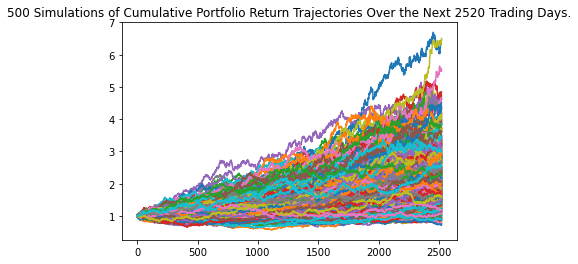

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten=MC_sims.plot_simulation()

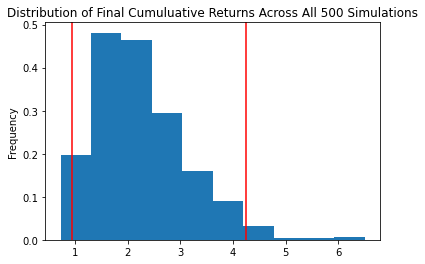

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_ten=MC_sims.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten=MC_sims.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_ten)

count           500.000000
mean              2.253895
std               0.878277
min               0.722997
25%               1.635775
50%               2.089750
75%               2.788830
max               6.501435
95% CI Lower      0.940960
95% CI Upper      4.237522
Name: 2520, dtype: float64


In [37]:
# Set initial investment
# YOUR CODE HERE!
initial_investment=20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten=round(tbl_ten[8]*initial_investment,2)
ci_upper_ten=round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $18819.2 and $84750.44
